In [1]:
# General
import pandas as pd
import numpy as np
from collections import Counter

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# NPL
from textblob import TextBlob
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords 
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
# Reading the data
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
# Inspecting the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [4]:
# Drop the first column, which has the duplicate index information
df = df.drop(['Unnamed: 0'],axis=1)

In [5]:
# Drop the missing values from ‘Review Text’ columns 
df = df[df['Review Text'].notnull()]

In [6]:
# Create new variables
# review length
df['Review Length']= df['Review Text'].apply(len)

In [7]:
# polarity
df['Polarity score'] = df['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [8]:
# add sentiment columns
df['Sentiment']=''
df.loc[df['Polarity score']>0,'Sentiment']='Positive'
df.loc[df['Polarity score']==0,'Sentiment']='Neutral'
df.loc[df['Polarity score']<0,'Sentiment']='Negative'

In [9]:
# review text preprocessing
df['Tokenized Text'] = df['Review Text'].str.lower().str.strip()
df['Tokenized Text'] = df['Tokenized Text'].str.replace('\d+','')
df['Tokenized Text'] = df['Tokenized Text'].str.replace('[^\w\s]', '')

In [10]:
# tokenized review text
tokenizer = WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def lemmatize_text(text):
      return [lemmatizer.lemmatize(w) for w in tokenizer.tokenize(text)]
def remove_stopwords(text):
    return[w for w in text if not w in stop_words]
df['Tokenized Text'] = df['Tokenized Text'].astype(str).apply(lemmatize_text)
df['Tokenized Text'] = df['Tokenized Text'].apply(remove_stopwords)
df['Tokenized Text'] = df['Tokenized Text'].apply(lambda x: ' '.join(x))

In [11]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Length,Polarity score,Sentiment,Tokenized Text
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53,0.633333,Positive,absolutely wonderful silky sexy comfortable
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303,0.339583,Positive,love dress sooo pretty happened find store im ...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,0.073675,Positive,high hope dress really wanted work initially o...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124,0.550000,Positive,love love love jumpsuit fun flirty fabulous ev...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,0.512891,Positive,shirt flattering due adjustable front tie perf...


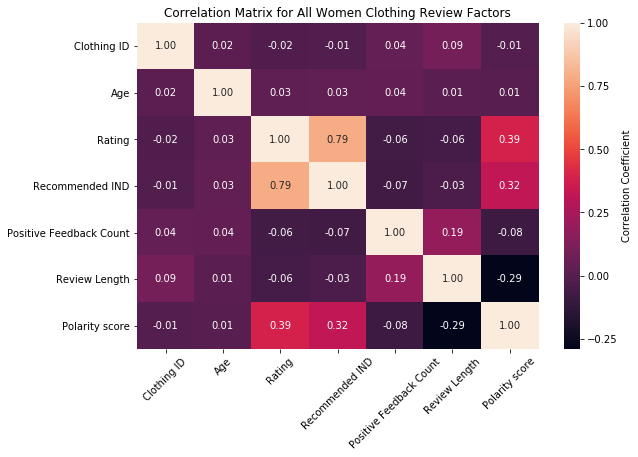

In [12]:
#Correlation Matrix for All Women Clothing Review Factors
plt.figure(figsize=[9,6])
_ = sns.heatmap(df.corr(), annot=True, fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Matrix for All Women Clothing Review Factors")
plt.xticks(rotation=45)
plt.show()

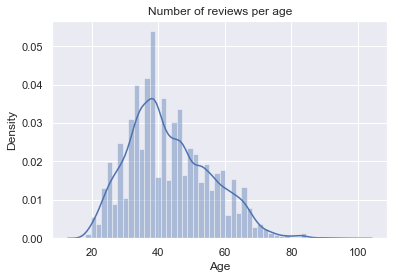

In [13]:
# overall age distribution
sns.set()
sns.distplot(df.Age)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Number of reviews per age')
plt.show()

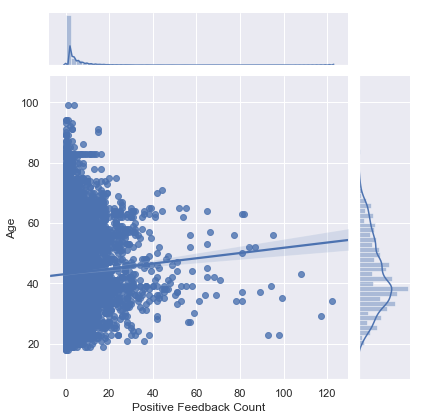

In [14]:
# the relationship between Positive Feedback vs Age
sns.jointplot(df['Positive Feedback Count'],df.Age,kind='reg')
plt.show()

In [15]:
# the total number of clothing ID 
print('the total number of Clothing ID in this dataset is: '+str(len(df['Clothing ID'].value_counts())))

the total number of Clothing ID in this dataset is: 1179


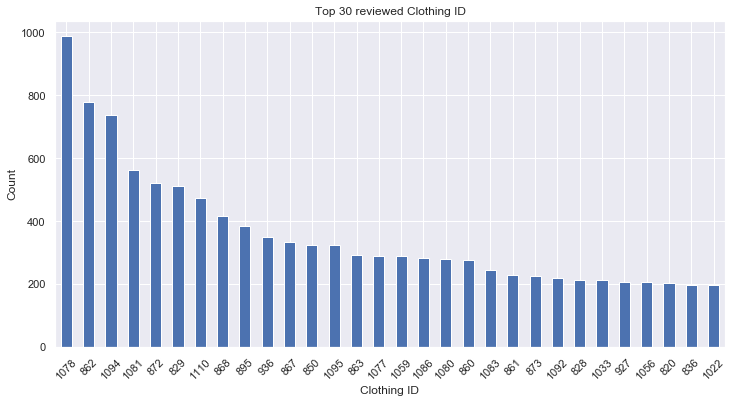

In [16]:
# the top 30 clothing ID
plt.figure(figsize=(12, 6))
df['Clothing ID'].value_counts()[:30].plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('Clothing ID')
plt.ylabel('Count')
plt.title('Top 30 reviewed Clothing ID')
plt.show()

In [17]:
# find what is the most popular reivewing items
df1=df[df['Clothing ID'].isin([1078,863,1094])]['Class Name'].unique()
print('the most popular riewing items are : '+ str(df1))

the most popular riewing items are : ['Dresses' 'Knits']


In [18]:
# overal infro of the top reivewing items
df[df['Clothing ID'].isin([1078, 862,1094])].describe().drop('count',axis=0).drop('Clothing ID',axis =1)

,Age,Rating,Recommended IND,Positive Feedback Count,Review Length,Polarity score
mean,42.724800,4.189200,0.818400,2.862400,310.860400,0.256109
std,12.150429,1.104306,0.385592,6.773021,144.836158,0.178384
min,18.000000,1.000000,0.000000,0.000000,16.000000,-0.500000
25%,34.000000,4.000000,1.000000,0.000000,189.000000,0.149074
50%,41.000000,5.000000,1.000000,1.000000,305.000000,0.247036
75%,51.000000,5.000000,1.000000,3.000000,469.000000,0.357143
max,99.000000,5.000000,1.000000,98.000000,504.000000,1.000000


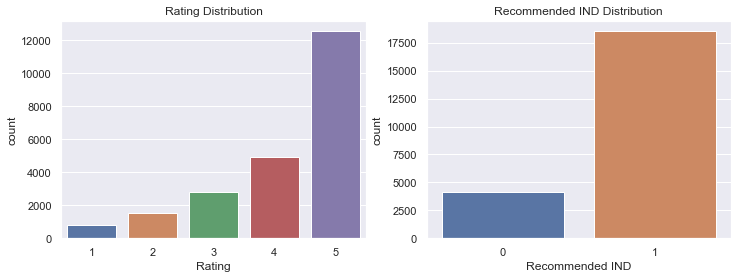

In [19]:
# overall Rating and Recommended IND distribution
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(df.Rating)
plt.title('Rating Distribution')
plt.subplot(1,2,2)
sns.countplot(df['Recommended IND'])
plt.title('Recommended IND Distribution')
plt.show()

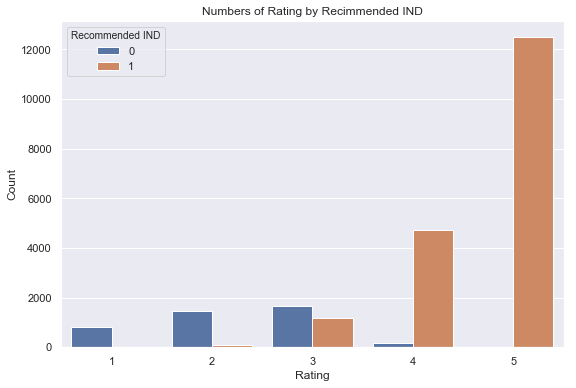

In [20]:
# Numbers of Rating by Recimmended IND
plt.figure(figsize=[9,6])
sns.countplot(x="Rating", hue="Recommended IND",data=df)
plt.title('Numbers of Rating by Recimmended IND')
plt.ylabel("Count")
plt.show()

In [21]:
# The Not recommend Portion
dislike = df['Recommended IND'].value_counts()[0]/(df['Recommended IND'].value_counts()[0]+df['Recommended IND'].value_counts()[1])
print('The Not recommend Portion in this datset is : '+str(dislike))

The Not recommend Portion in this datset is : 0.18113157546044786


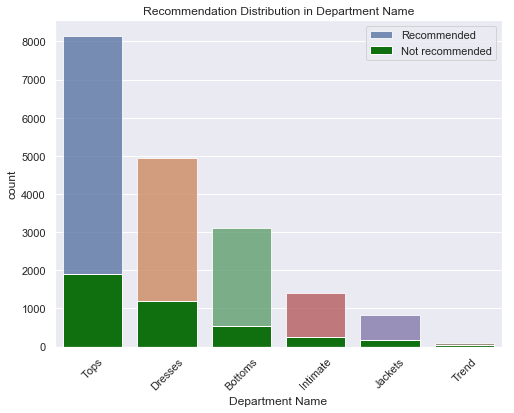

In [22]:
plt.figure(figsize = ((8,6)))
recommended = df[df['Recommended IND'] ==1]
not_recommended = df[df['Recommended IND']==0]
sns.countplot(recommended['Department Name'], order=df["Department Name"].value_counts().index,alpha=0.8, label = 'Recommended')
sns.countplot(not_recommended['Department Name'],order = df["Department Name"].value_counts().index,color= 'green',label='Not recommended')
plt.xticks(rotation=45)
plt.legend(loc= 'upper right')
plt.title('Recommendation Distribution in Department Name')
plt.show()

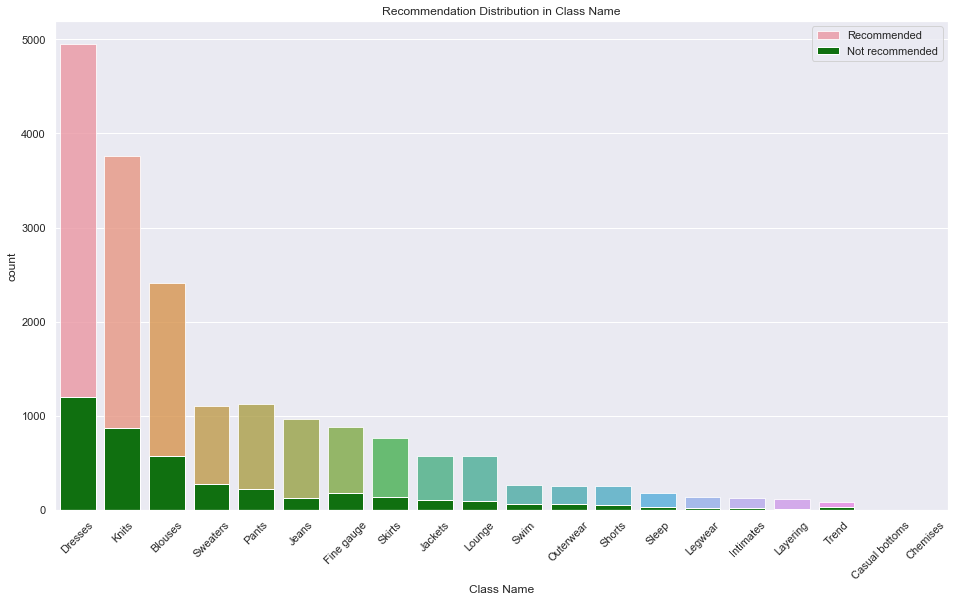

In [23]:
plt.figure(figsize = ((16,9)))
sns.countplot(recommended['Class Name'], order=df["Class Name"].value_counts().index,alpha=0.8, label = 'Recommended')
sns.countplot(not_recommended['Class Name'],order = df["Class Name"].value_counts().index,color= 'green',label='Not recommended')
plt.xticks(rotation=45)
plt.legend(loc= 'upper right')
plt.title('Recommendation Distribution in Class Name')
plt.show()

In [24]:
# reviw length in rating
rating = df.groupby(['Rating'])['Review Length'].count()
rating

Rating
1      821
2     1549
3     2823
4     4908
5    12540
Name: Review Length, dtype: int64

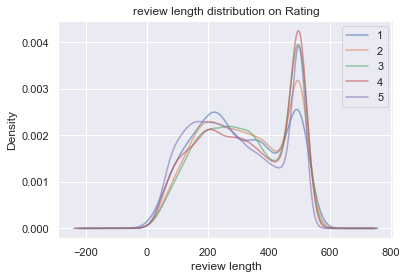

In [25]:
# review length distribution on Rating
df.groupby('Rating')['Review Length'].plot(kind = 'density',alpha=0.6)
plt.legend()
plt.xlabel('review length')
plt.title('review length distribution on Rating')
plt.show()

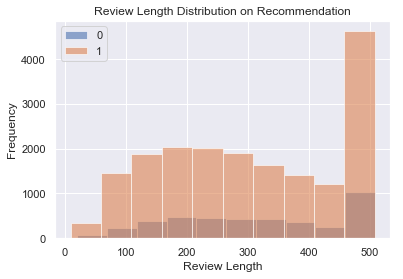

In [26]:
# review length distribution on Recommendation
df.groupby('Recommended IND')['Review Length'].plot(kind = 'hist',alpha = 0.6)
plt.legend()
plt.xlabel('Review Length')
plt.title('Review Length Distribution on Recommendation')
plt.show()

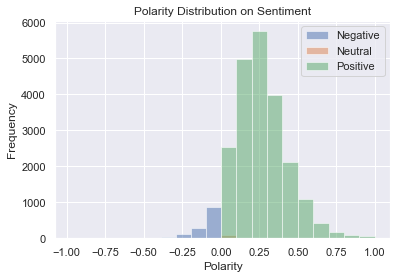

In [27]:
# sentiment analysis
df.groupby('Sentiment')['Polarity score'].plot(kind = 'hist',alpha=0.5)
plt.legend()
plt.title('Polarity Distribution on Sentiment')
plt.xlabel('Polarity')
plt.show()

In [28]:
# Saperate datafame in Positive riew and nagetive review
df_po = df['Review Text'][df['Recommended IND']==1]
df_nag = df['Review Text'][df['Recommended IND']==0]

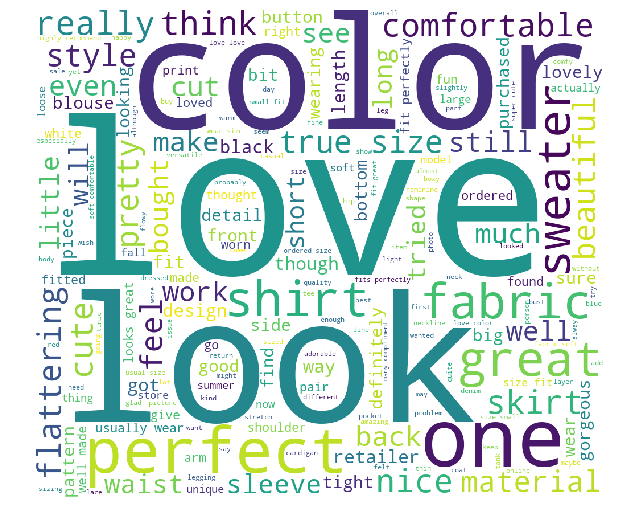

In [29]:

# words in Positive Reviews
plt.figure(figsize = ((16,9)))
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                   + [x.lower() for x in list(df["Department Name"][df["Department Name"].notnull()].unique())]
                   + ["dress", "petite", "jacket","top"])
wordcloud = WordCloud(background_color='white',width=1000, height=860,stopwords=new_stop).generate(''.join(df_po))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

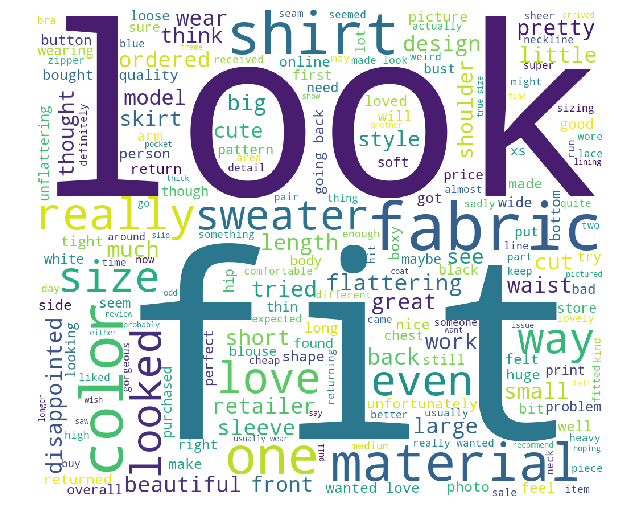

In [30]:
# words in Nagetive Review
plt.figure(figsize = ((16,9)))
wordcloud = WordCloud(background_color='white',width=1000, height=860,stopwords=new_stop).generate(''.join(df_nag))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [31]:
# initialize the vectorizer
count = CountVectorizer(stop_words='english', min_df=.0025, max_df=.9, ngram_range=(1,2))
count.fit(df['Tokenized Text'])
len(count.vocabulary_)

1797

In [32]:
#transform the document into a bag of words
bag_of_words = count.transform(df['Tokenized Text'])
print('sparse matrix shape:', bag_of_words.shape)
print('nonzero count:', bag_of_words.nnz)
print('sparsity: %.2f%%' % (100.0 * bag_of_words.nnz / (bag_of_words.shape[0] * bag_of_words.shape[1])))


sparse matrix shape: (22641, 1797)
nonzero count: 544694
sparsity: 1.34%


In [37]:
# check the top 30 most common terms
occ = np.asarray(bag_of_words.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': count.get_feature_names(), 'occurrences': occ})
counts_df.sort_values(by='occurrences', ascending=False).head(30)

,term,occurrences
1626,wa,12236
375,dress,11320
498,fit,10096
1342,size,9355
888,love,8968
808,like,7018
218,color,6903
859,look,6873
1709,wear,6512
602,great,6076


In [34]:
# use the TfidfTransformer to calculate the weights for each term
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(bag_of_words)
transformed_weights

<22641x1797 sparse matrix of type '<class 'numpy.float64'>'
	with 544694 stored elements in Compressed Sparse Row format>

In [35]:
# check the top 30 most common terms by average ti-idf weight
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': count.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(30)

,term,weight
375,dress,0.045159
1626,wa,0.041961
888,love,0.037289
498,fit,0.036258
1342,size,0.035011
602,great,0.029824
218,color,0.029518
859,look,0.029086
808,like,0.028629
1709,wear,0.027913
